**Task**

Analyze the dataset. Create at least 10 images, graphs, diagrams.

Make a small summary for each image.

Create at least 5 new features manually

Optionally, use the library to automatically generate new features

In [1]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so
import numpy as np

In [3]:
# define tables path to variables
players_table_path = "/content/drive/MyDrive/Hillel_ML_Course/4/data/Players.csv"
player_data_table_path = "/content/drive/MyDrive/Hillel_ML_Course/4/data/player_data.csv"
season_stats_table_path = "/content/drive/MyDrive/Hillel_ML_Course/4/data/Seasons_Stats.csv"

In [4]:
# load tables
players_table = pd.read_csv(players_table_path)
player_data_table = pd.read_csv(player_data_table_path)
season_stats_table = pd.read_csv(season_stats_table_path)

In [5]:
# look out players_table
players_table.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
# look out player_data_table
player_data_table.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


#Part 1 - Merge tables
i decided to join two previous tables by columns name and birth date to avoid getting data for people with same name. to do it:

1 check type of column birth_date, convert to datetime type if need

2 extract year in new column

3 merge tables

## check type of column birth_date, convert to datetime type if need

In [7]:
#check out data type in player_data_table
player_data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [8]:
players_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [9]:
#as i see birth_date has object type, so convert it
player_data_table["birth_date"]=pd.to_datetime(player_data_table["birth_date"])

#and check again
player_data_table["birth_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4550 entries, 0 to 4549
Series name: birth_date
Non-Null Count  Dtype         
--------------  -----         
4519 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 35.7 KB


In [10]:
# check table again
player_data_table.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,1968-06-24,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,1946-04-07,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,1947-04-16,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,1969-03-09,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,1974-11-03,San Jose State University


## extracting just year in new column by pd.DatetimeIndex

In [11]:
#create column "born" with year born data
player_data_table["born"] = pd.DatetimeIndex(player_data_table["birth_date"]).year

In [12]:
#change columns name to have same
players_table = players_table.rename(columns={"Player":"name"})
players_table.head()

,Unnamed: 0,name,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [13]:
# check table again
player_data_table.head()

,name,year_start,year_end,position,height,weight,birth_date,college,born
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,1968-06-24,Duke University,1968.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,1946-04-07,Iowa State University,1946.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,1947-04-16,"University of California, Los Angeles",1947.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,1969-03-09,Louisiana State University,1969.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,1974-11-03,San Jose State University,1974.0



## merge players data tables tables

In [14]:
#before merging check for nan in "key" columns

print(player_data_table["born"].isna().sum())
print(players_table["born"].isna().sum())

31
1


In [15]:
#drop columns with nan values
player_data_table["born"] = player_data_table["born"].dropna().copy()
players_table["born"] = players_table["born"].dropna().copy()

In [16]:
#merge tables by "name" and "year" columns
player_data_merged = pd.merge(players_table, player_data_table,
                              on=["name", "born"])

In [17]:
player_data_merged

,Unnamed: 0,name,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,G-F,5-11,170.0,1918-11-01,Indiana University
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,G,6-2,185.0,1921-01-15,University of Kentucky
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950,1954,F-G,6-4,190.0,1924-05-11,University of Notre Dame
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,1950,1951,F,6-5,195.0,1925-10-08,North Carolina State University
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950,1951,G,5-10,175.0,1927-12-02,University of Kentucky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516,3916,Isaiah Whitehead,193.0,96.0,Seton Hall University,1995.0,Brooklyn,New York,2017,2018,G,6-4,213.0,1995-03-08,Seton Hall University
3517,3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon,2017,2017,F,6-10,240.0,1992-10-20,Gonzaga University
3518,3919,Stephen Zimmerman,213.0,108.0,"University of Nevada, Las Vegas",1996.0,Hendersonville,Tennessee,2017,2017,C,7-0,240.0,1996-09-09,"University of Nevada, Las Vegas"
3519,3920,Paul Zipser,203.0,97.0,NaN,1994.0,Heidelberg,Germany,2017,2018,G-F,6-8,215.0,1994-02-18,NaN


## Merge player data table with players stats

as i see in players stats table it includes age player and year of season, so i can create new column with year of born and it was mistake because i faced with problem : when i subtract age from season year result has not accurate bicause this data depened on month of player birth. so i find another column - "position"  
so:

1 rename "Position" column

2 rename "Player" column

3 merge tables

In [18]:
season_stats_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [19]:
# look out player_data_table
season_stats_table.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [20]:
# add new column with extracted month of born data

player_data_merged["month_born"] = pd.DatetimeIndex(player_data_merged["birth_date"]).month

In [21]:
#look at players who were borned in Jan
player_data_merged[player_data_merged["month_born"]==1].reset_index().loc[:10,:]

,index,Unnamed: 0,name,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,month_born
0,1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,G,6-2,185.0,1921-01-15,University of Kentucky,1
1,18,18,Jim Browne,208.0,106.0,NaN,1930.0,Midlothian,Illinois,1949,1950,C,6-10,235.0,1930-01-01,NaN,1
2,28,29,Bill Closs,196.0,88.0,Rice University,1922.0,Edge,Texas,1950,1952,F-C,6-5,195.0,1922-01-08,Rice University,1
3,32,33,Ray Corley,183.0,81.0,Georgetown University,1928.0,NaN,NaN,1950,1953,G,6-0,180.0,1928-01-01,Georgetown University,1
4,34,35,Dillard Crocker,193.0,92.0,Western Michigan University,1925.0,Coffee County,Tennessee,1949,1953,F-G,6-4,205.0,1925-01-19,Western Michigan University,1
5,38,40,Hook Dillon,190.0,81.0,University of North Carolina,1924.0,Savannah,Georgia,1950,1950,F,6-3,180.0,1924-01-08,University of North Carolina,1
6,48,50,Bob Feerick,190.0,86.0,Santa Clara University,1920.0,San Francisco,California,1947,1950,F-G,6-3,190.0,1920-01-02,Santa Clara University,1
7,61,65,Joe Graboski,201.0,88.0,NaN,1930.0,NaN,NaN,1949,1962,F-C,6-7,195.0,1930-01-15,NaN,1
8,89,97,Jack Kerris,198.0,97.0,Loyola University of Chicago,1925.0,NaN,NaN,1950,1953,F-C,6-6,215.0,1925-01-30,Loyola University of Chicago,1
9,93,101,Duane Klueh,190.0,79.0,Indiana State University,1926.0,Bottineau,North Dakota,1950,1951,G,6-3,175.0,1926-01-06,Indiana State University,1


In [22]:
season_stats_table[season_stats_table["Player"]=="Curly Armstrong*"]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [23]:
player_data_merged[player_data_merged["name"]=="Curly Armstrong"]

,Unnamed: 0,name,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,month_born
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,G-F,5-11,170.0,1918-11-01,Indiana University,11


##Observe position in tables

In [24]:
#check positions in player_data table
player_data_merged["position"].unique()

array(['G-F', 'G', 'F-G', 'F', 'F-C', 'C', 'C-F', nan], dtype=object)

In [25]:
#check position in season_stats table
season_stats_table["Pos"].unique()

array(['G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
       nan, 'PF-C', 'SF-SG', 'C-PF', 'SG-SF', 'PF-SF', 'SF-PF', 'SG-PG',
       'SF-PG', 'C-SF', 'PG-SG', 'PG-SF', 'SG-PF'], dtype=object)

##Observe how much players appear in data

Let's look how much players name appear in data

In [26]:
#i decide to check names who appear in data more then 23 times
count_players = season_stats_table["Player"].value_counts()
count_players_more_23 = count_players[count_players>23]
count_players_more_23

,count
Player,
Eddie Johnson,33
Mike Dunleavy,32
Gerald Henderson,29
Nazr Mohammed,28
Kevin Willis,27
Joe Smith,26
George Johnson,26
Andre Miller,25
Juwan Howard,25


in this series 2 kind of players: Players with same name and Players who used to play for a long time

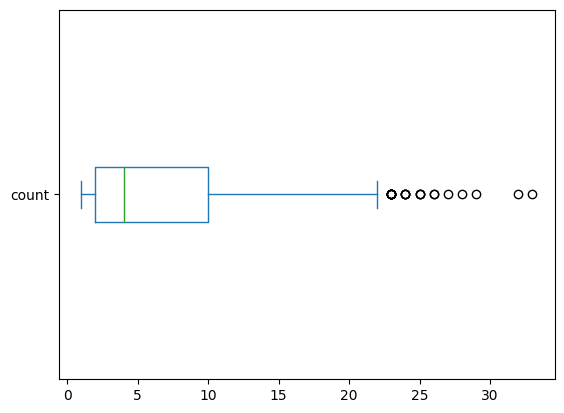

In [27]:
#Let's see how much players appear in data to look players with same names
plt.figure();
count_players.plot.box(vert=False,);

From plot i know, that average count players names in data is 5 and names thet occure more then 23 times look`s like outlayers

In [28]:
#check player, who appear 23 times : Andre Miller - 2 players, appear 25 times;
#George Johnson - appears 26 times; Gerald Henderson - 29, Mike Dunleavy -32
#Eddie Johnson - 33
season_stats_table[season_stats_table["Player"]=="Ralph Beard"]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
321,321,1951.0,Ralph Beard,G,23.0,INO,66.0,NaN,NaN,NaN,...,0.775,NaN,NaN,251.0,318.0,NaN,NaN,NaN,96.0,1111.0


In [29]:
#check if appear in names in merged data more then 1 times
player_data_name_count = player_data_merged["name"].value_counts()
player_data_name_count_more_1 = player_data_name_count[player_data_name_count>1]
player_data_name_count_more_1

,count
name,


In [30]:
player_data_merged[player_data_merged["month_born"]==1]

,Unnamed: 0,name,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,month_born
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,G,6-2,185.0,1921-01-15,University of Kentucky,1
18,18,Jim Browne,208.0,106.0,NaN,1930.0,Midlothian,Illinois,1949,1950,C,6-10,235.0,1930-01-01,NaN,1
28,29,Bill Closs,196.0,88.0,Rice University,1922.0,Edge,Texas,1950,1952,F-C,6-5,195.0,1922-01-08,Rice University,1
32,33,Ray Corley,183.0,81.0,Georgetown University,1928.0,NaN,NaN,1950,1953,G,6-0,180.0,1928-01-01,Georgetown University,1
34,35,Dillard Crocker,193.0,92.0,Western Michigan University,1925.0,Coffee County,Tennessee,1949,1953,F-G,6-4,205.0,1925-01-19,Western Michigan University,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,3877,Nicolas Laprovittola,193.0,81.0,NaN,1990.0,Buenos Aires,Argentina,2017,2017,G,6-4,180.0,1990-01-31,NaN,1
3483,3880,Shawn Long,206.0,115.0,University of Louisiana at Lafayette,1993.0,Morgan City,Louisiana,2017,2017,C-F,6-9,255.0,1993-01-29,University of Louisiana at Lafayette,1
3492,3890,David Nwaba,193.0,94.0,"California Polytechnic State University, San L...",1993.0,Los Angeles,California,2017,2018,G,6-4,209.0,1993-01-14,"California Polytechnic State University, San L...",1
3501,3900,Malachi Richardson,198.0,92.0,Syracuse University,1996.0,Trenton,New Jersey,2017,2018,G,6-6,205.0,1996-01-05,Syracuse University,1


As we know if the NBA season starts at for example 1949 year it will named like 1950 year. and NBA season starts in october, so lets check guys, who has month of birth before october and compare it with data stats

now, we see that average appear name in data is 5. for me interesting thet players, who appears more then 10 times

In [31]:
#Create column "born" by subtitling columns "Age" from "Year" column
#my mistake disicion


season_stats_table["born"] =  season_stats_table["Year"] - \
                                                    season_stats_table["Age"]

In [32]:
player_data_merged.head()

,Unnamed: 0,name,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,month_born
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,G-F,5-11,170.0,1918-11-01,Indiana University,11
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,G,6-2,185.0,1921-01-15,University of Kentucky,1
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,1950,1954,F-G,6-4,190.0,1924-05-11,University of Notre Dame,5
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,1950,1951,F,6-5,195.0,1925-10-08,North Carolina State University,10
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,1950,1951,G,5-10,175.0,1927-12-02,University of Kentucky,12


In [33]:
#if now i interested just in date values, so i create 2 tables with names and date data

date_time_players_data = player_data_merged[["name", "born", "birth_date",
                                                                  "month_born"]]

date_time_season_stat_data = season_stats_table[["Player", "Age", "born", "Year"]]

In [34]:
#define all guys who was born in jan
born_in_jan = date_time_players_data[date_time_players_data["month_born"]==1]["name"].to_list()

In [35]:
#how much players were born in Jan
len(born_in_jan)

304

In [36]:
# check who borned in Jan has different values in tables

for i in date_time_season_stat_data["Player"]:
    if i in born_in_jan:
        year_season_data = date_time_season_stat_data.loc\
                  [date_time_season_stat_data["Player"] == i, "born"].values[0]
        year_player_data = date_time_players_data.loc\
                         [date_time_players_data["name"] == i, "born"].values[0]

        if year_season_data != year_player_data:
            print(f"{i} has different values:season data = {year_season_data}",
                                          f"player data = {year_player_data}")


Sam Smith has different values:season data = 1955.0 player data = 1944.0
Sam Smith has different values:season data = 1955.0 player data = 1944.0


In [37]:
date_time_season_stat_data[date_time_season_stat_data["Player"]=="Dillard Crocker"]

,Player,Age,born,Year
45,Dillard Crocker,25.0,1925.0,1950.0
513,Dillard Crocker,27.0,1925.0,1952.0
514,Dillard Crocker,27.0,1925.0,1952.0
515,Dillard Crocker,27.0,1925.0,1952.0
648,Dillard Crocker,28.0,1925.0,1953.0


In [38]:
date_time_players_data[date_time_players_data["month_born"]==1]

,name,born,birth_date,month_born
1,Cliff Barker,1921.0,1921-01-15,1
18,Jim Browne,1930.0,1930-01-01,1
28,Bill Closs,1922.0,1922-01-08,1
32,Ray Corley,1928.0,1928-01-01,1
34,Dillard Crocker,1925.0,1925-01-19,1
...,...,...,...,...
3480,Nicolas Laprovittola,1990.0,1990-01-31,1
3483,Shawn Long,1993.0,1993-01-29,1
3492,David Nwaba,1993.0,1993-01-14,1
3501,Malachi Richardson,1996.0,1996-01-05,1


In [39]:
date_time_players_data[date_time_players_data["name"]=="Sam Smith"]

,name,born,birth_date,month_born
1184,Sam Smith,1944.0,1944-01-27,1


In [40]:
season_stats_table[season_stats_table["Player"]=="Ralph Beard"]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,born
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0,1928.0
321,321,1951.0,Ralph Beard,G,23.0,INO,66.0,NaN,NaN,NaN,...,NaN,NaN,251.0,318.0,NaN,NaN,NaN,96.0,1111.0,1928.0


After data check i know, that all player who born in January has same born data in both tables except Sam Smith

In [41]:
# change "born" column
season_stats_table["born"] = season_stats_table.apply(lambda x:
        (x["born"] if x["Player"] in born_in_jan and x["Player"]
                                    != "Sam Smith" else x["born"] - 1), axis=1)

In [42]:
season_stats_table.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,born
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,1918.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,1921.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,1924.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,1925.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,1925.0


In [43]:
date_time_players_data.head()

,name,born,birth_date,month_born
0,Curly Armstrong,1918.0,1918-11-01,11
1,Cliff Barker,1921.0,1921-01-15,1
2,Leo Barnhorst,1924.0,1924-05-11,5
3,Ed Bartels,1925.0,1925-10-08,10
4,Ralph Beard,1927.0,1927-12-02,12


In [44]:
# # rename columns "Player" to "name" as it necessary before merge
season_stats_table = season_stats_table.rename(columns={"Player":"name"})
# season_stats_table = season_stats_table.rename(columns={"Pos":"position"})

In [45]:
#merge tables by "name" and "born columns"
merged_data = pd.merge(season_stats_table, player_data_merged,
                                               on=["name", "born"], how="outer")

In [46]:
# player_data_merged[player_data_merged["name"]=="Leo Barnhorst"]

In [47]:
# #check final table
merged_data.head(20)

,Unnamed: 0_x,Year,name,Pos,Age,Tm,G,GS,MP,PER,...,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,month_born
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,1949.0,1951.0,G-F,5-11,170.0,1918-11-01,Indiana University,11.0
1,314.0,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,...,NaN,NaN,1949.0,1951.0,G-F,5-11,170.0,1918-11-01,Indiana University,11.0
2,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
3,315.0,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
4,489.0,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
5,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,NaN,NaN,1950.0,1954.0,F-G,6-4,190.0,1924-05-11,University of Notre Dame,5.0
6,316.0,1951.0,Leo Barnhorst,SF,26.0,INO,68.0,NaN,NaN,NaN,...,NaN,NaN,1950.0,1954.0,F-G,6-4,190.0,1924-05-11,University of Notre Dame,5.0
7,491.0,1952.0,Leo Barnhorst,SF,27.0,INO,66.0,NaN,2344.0,15.9,...,NaN,NaN,1950.0,1954.0,F-G,6-4,190.0,1924-05-11,University of Notre Dame,5.0
8,621.0,1953.0,Leo Barnhorst,SF,28.0,INO,71.0,NaN,2871.0,16.0,...,NaN,NaN,1950.0,1954.0,F-G,6-4,190.0,1924-05-11,University of Notre Dame,5.0
9,784.0,1954.0,Leo Barnhorst,F-G,29.0,TOT,72.0,NaN,2064.0,NaN,...,NaN,NaN,1950.0,1954.0,F-G,6-4,190.0,1924-05-11,University of Notre Dame,5.0


In [48]:
# look at first and last five rows
merged_data

,Unnamed: 0_x,Year,name,Pos,Age,Tm,G,GS,MP,PER,...,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,month_born
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,1949.0,1951.0,G-F,5-11,170.0,1918-11-01,Indiana University,11.0
1,314.0,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,...,NaN,NaN,1949.0,1951.0,G-F,5-11,170.0,1918-11-01,Indiana University,11.0
2,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
3,315.0,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,NaN,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
4,489.0,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,10.8,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24697,NaN,NaN,Tony Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brooklyn,New York,1968.0,1969.0,F-G,6-4,200.0,1942-11-07,St. John's University,11.0
24698,NaN,NaN,David Vaughn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nashville,Tennessee,1975.0,1976.0,C,6-11,220.0,1952-06-04,Oral Roberts University,6.0
24699,NaN,NaN,David Lee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Modesto,California,1968.0,1969.0,F,6-7,225.0,1942-03-31,University of San Francisco,3.0
24700,NaN,NaN,Patrick Ewing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kingston,Jamaica,1986.0,2002.0,C-F,7-0,240.0,1962-08-05,Georgetown University,8.0


In [49]:
#save merged table
# merged_data.to_csv("merged_data.csv")

#Part 2 - statistic analysis

In [50]:
# load data from merged columns
data = pd.read_csv("/content/drive/MyDrive/Hillel_ML_Course/4/data/merged_data.csv")

In [51]:
#and how it looks:
data.head()

,Unnamed: 0,Unnamed: 0_x,Year,name,Pos,Age,Tm,G,GS,MP,...,birth_city,birth_state,year_start,year_end,position,height_y,weight_y,birth_date,college,month_born
0,0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,...,NaN,NaN,1949.0,1951.0,G-F,5-11,170.0,1918-11-01,Indiana University,11.0
1,1,314.0,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,...,NaN,NaN,1949.0,1951.0,G-F,5-11,170.0,1918-11-01,Indiana University,11.0
2,2,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
3,3,315.0,1951.0,Cliff Barker,SG,30.0,INO,56.0,NaN,NaN,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0
4,4,489.0,1952.0,Cliff Barker,SG,31.0,INO,44.0,NaN,494.0,...,Yorktown,Indiana,1950.0,1952.0,G,6-2,185.0,1921-01-15,University of Kentucky,1.0


In [52]:
#let's see columns
data.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Year', 'name', 'Pos', 'Age', 'Tm', 'G',
       'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48',
       'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'born',
       'Unnamed: 0_y', 'height_x', 'weight_x', 'collage', 'birth_city',
       'birth_state', 'year_start', 'year_end', 'position', 'height_y',
       'weight_y', 'birth_date', 'college', 'month_born'],
      dtype='object')

In [53]:
#define unnecessary columns and drop them
# in this list height and weight in Foots and LBS, position whe players were
# started their carrer

unnecessary_columns = ['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0_y', 'height_y',
       'weight_y', 'position']

data = data.drop(columns=unnecessary_columns, axis=0).copy()

##more feature engineering

In [54]:
#create feature how old player end crrier(age_end)

data["age_end"] = data["year_end"] - data["born"]

From wikipedia  index body mass calculated 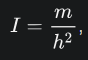

where m - mass, h - height

In [55]:
# we can add index body mass

data["ibm"] = data["weight_x"] / data["height_x"]**2

In [56]:
# how long player used to play in league : year end carrier - year start carrier

data["years_played"] = data["year_end"] - data["year_start"]

In [57]:
# how old was player when he started his carrier

data["carrier_start"] = data["year_start"] - data["born"]

In [58]:
# average played minutes by game all minutes played / all games

data["avg_game_min"] = data["MP"] / data["G"]

In [59]:
# in data splitted all goals from field and goals from free throws, so i sum it
# to get all goals in season

data["goals_per_season"]  = data["FT"] + data["FG"]

In [60]:
data.head(2)

,Year,name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,year_end,birth_date,college,month_born,age_end,ibm,years_played,carrier_start,avg_game_min,goals_per_season
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,1951.0,1918-11-01,Indiana University,11.0,33.0,0.002377,2.0,31.0,NaN,314.0
1,1951.0,Curly Armstrong,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,...,1951.0,1918-11-01,Indiana University,11.0,33.0,0.002377,2.0,31.0,NaN,130.0


## Statistic: when start and end profy carrier

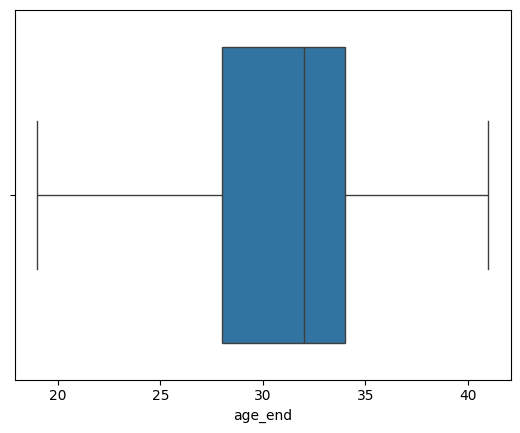

In [61]:
# let's see on age, when players finish carrier

sns.boxplot(x="age_end", data=data);

As we see from this picture  most players and carrier before 33 years

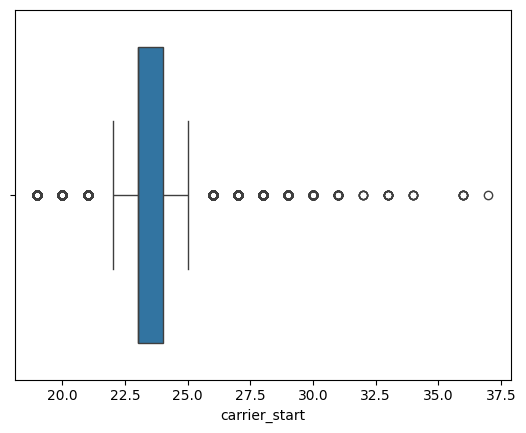

In [62]:
# let's see when players starts their carrier
sns.boxplot(x="carrier_start", data=data);

Most players start carrier from 22.5 to 24 years

## college with most quantity profy players

In [63]:
top_10_players_college = data["college"].value_counts()[:10]

In [64]:
top_10_players_college = top_10_players_college.reset_index()

In [65]:
top_10_players_college.columns = ["college", "count"]

In [66]:
print(top_10_players_college.get(["University of California, Los Angeles"]))

None


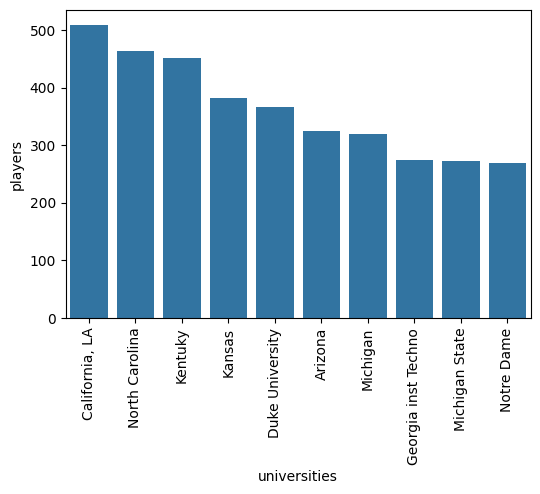

In [67]:
plt.figure(figsize=(6, 4))
sns.barplot(x='college', y='count', data=top_10_players_college)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],["California, LA", "North Carolina",
                                    "Kentuky","Kansas", "Duke University",
                                    "Arizona", "Michigan", "Georgia inst Techno",
                                    "Michigan State", "Notre Dame"],rotation=90)
plt.xlabel("universities")
plt.ylabel("players")
plt.show()

what position most early and lastly finishing their carrier

## its not surprise that i`ll interested in height and weight graphs, so:

In [68]:
#define players height variable
players_height = data.groupby("name")["height_x"].mean().dropna()

<Axes: xlabel='height_x', ylabel='Count'>

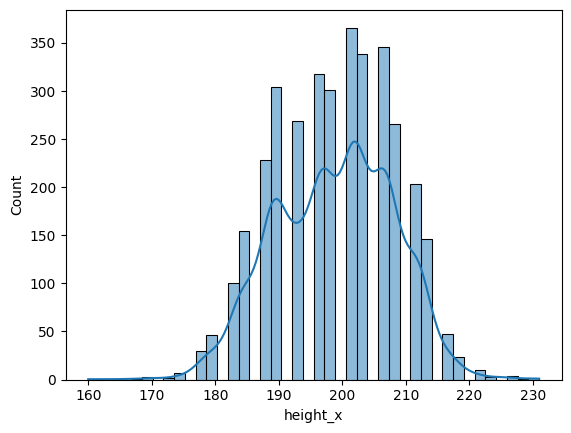

In [69]:
sns.histplot(data=players_height, kde=True)

Now we can see thet most players in league has height near 202 centimeters

In [70]:
#what weight this sportsmens have :)
players_weight = data.groupby("name")["weight_x"].mean().dropna().to_frame()


##Let's see correlation between weigh, height, body mass index, age and points, goals, succefful blocks

In [72]:
data["college"]

,college
0,Indiana University
1,Indiana University
2,University of Kentucky
3,University of Kentucky
4,University of Kentucky
...,...
24697,St. John's University
24698,Oral Roberts University
24699,University of San Francisco
24700,Georgetown University


In [73]:
data.columns

Index(['Year', 'name', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'born', 'height_x', 'weight_x', 'collage',
       'birth_city', 'birth_state', 'year_start', 'year_end', 'birth_date',
       'college', 'month_born', 'age_end', 'ibm', 'years_played',
       'carrier_start', 'avg_game_min', 'goals_per_season'],
      dtype='object')

In [74]:
corr_columns = ["Age","PER","FG","3P","2P","FT%","AST","ibm","height_x",
                 "weight_x", "AST", "STL", "BLK", "TOV", "PTS"]

In [75]:
data[corr_columns]

,Age,PER,FG,3P,2P,FT%,AST,ibm,height_x,weight_x,AST,STL,BLK,TOV,PTS
0,31.0,NaN,144.0,NaN,144.0,0.705,176.0,0.002377,180.0,77.0,176.0,NaN,NaN,NaN,458.0
1,32.0,NaN,72.0,NaN,72.0,0.644,77.0,0.002377,180.0,77.0,77.0,NaN,NaN,NaN,202.0
2,29.0,NaN,102.0,NaN,102.0,0.708,109.0,0.002348,188.0,83.0,109.0,NaN,NaN,NaN,279.0
3,30.0,NaN,51.0,NaN,51.0,0.649,115.0,0.002348,188.0,83.0,115.0,NaN,NaN,NaN,152.0
4,31.0,10.8,48.0,NaN,48.0,0.588,70.0,0.002348,188.0,83.0,70.0,NaN,NaN,NaN,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002416,193.0,90.0,NaN,NaN,NaN,NaN,NaN
24698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002224,211.0,99.0,NaN,NaN,NaN,NaN,NaN
24699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002525,201.0,102.0,NaN,NaN,NaN,NaN,NaN
24700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002380,213.0,108.0,NaN,NaN,NaN,NaN,NaN


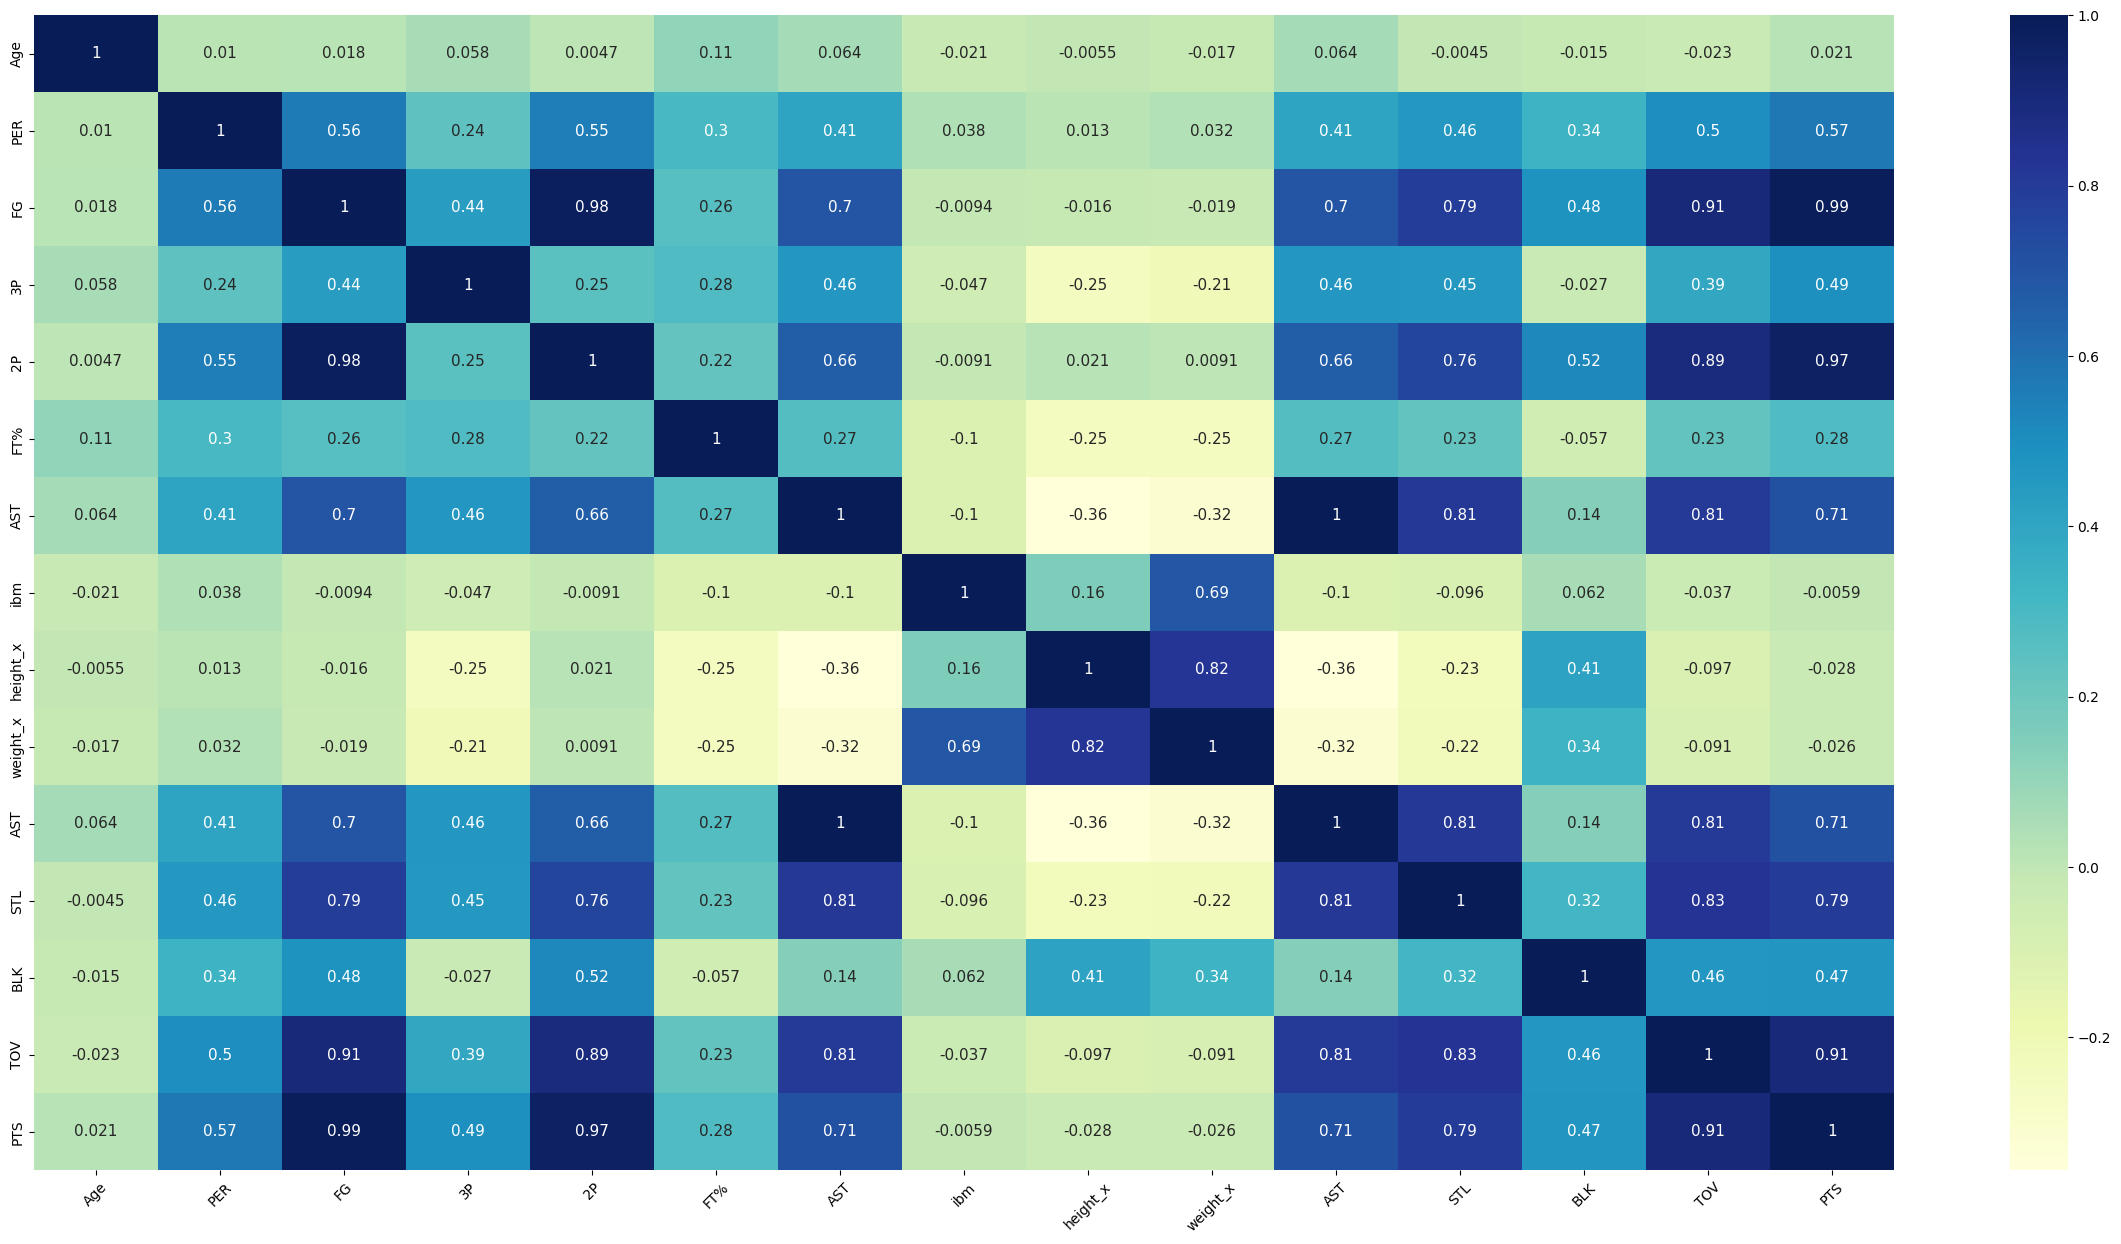

In [92]:
corr_matrix = data[corr_columns].corr()

plt.figure(figsize=(30, 15))

# Create mask
mask = np.triu(data[corr_columns])

#Create heatmap:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11},)
plt.xticks(rotation=45)
plt.show()

The correlation between between weigh, height, body mass index, age and points, goals, succefful blocks is absent

##correlation between all feature

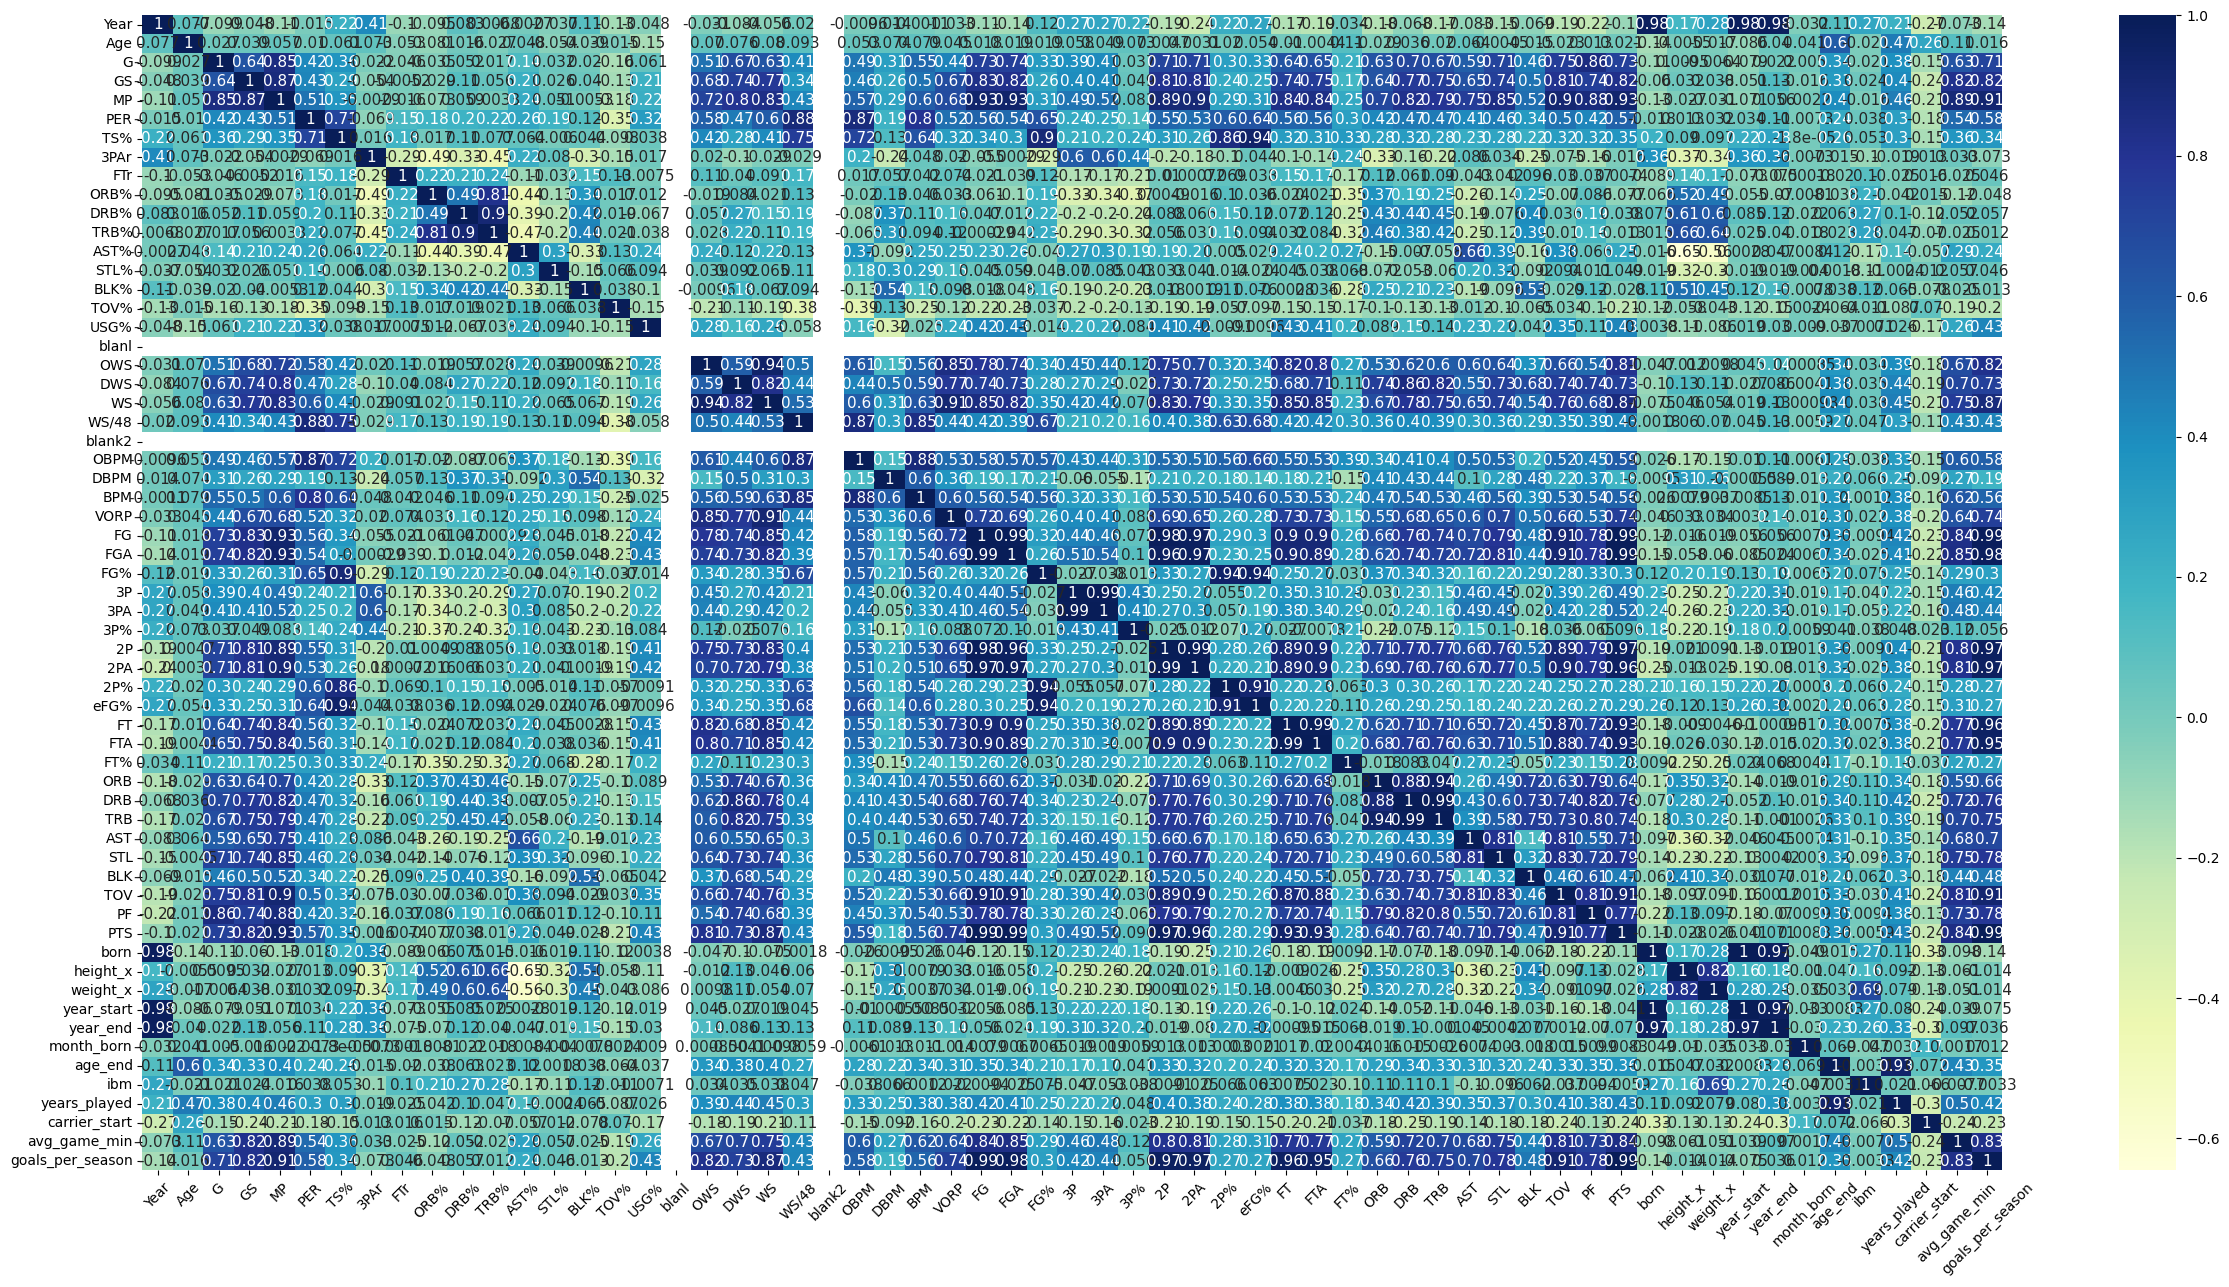

In [100]:
cor_data = data.drop(columns=["name", "collage", "college", "Pos", "Tm",
                                    "birth_city", "birth_state","birth_date"])
corr_matrix = cor_data.corr()

plt.figure(figsize=(30, 15))

# Create mask
mask = np.triu(data[corr_columns])

#Create heatmap:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11},)
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Count'>

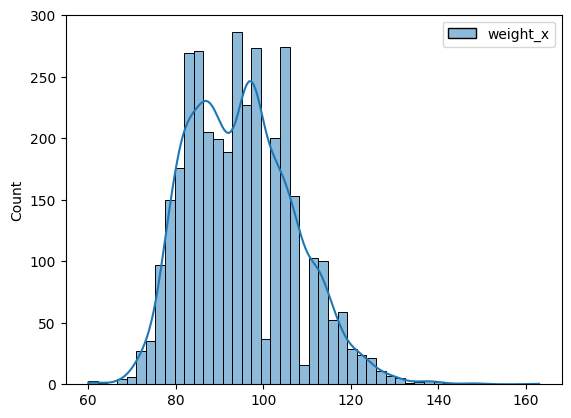

In [71]:
sns.histplot(data=players_weight, kde=True)

Many players have weight near 100 kg. how there jumping so high :)

## Interesting thing. What a "gold" age? when peak of form? let's how old players have most high points

In [78]:
# Set columns Age and Poins and define it to variable
age_points = data[["Age", "PTS"]]
age_points = age_points.groupby("Age")["PTS"].mean().to_frame()

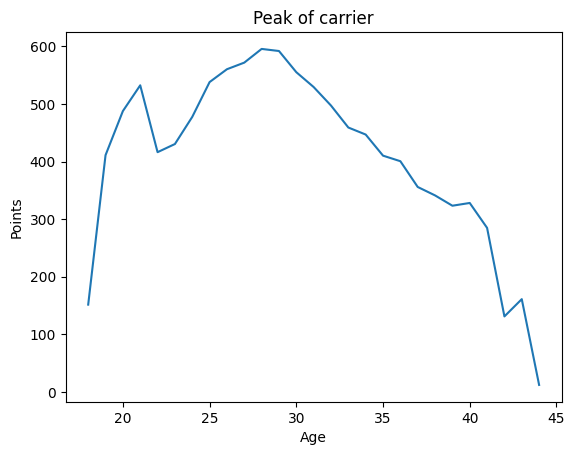

In [79]:
# create plot with dependese points to age

sns.lineplot(data=age_points, x=age_points.index, y="PTS")

plt.title("Peak of carrier")
plt.xlabel("Age")
plt.ylabel("Points")

plt.show()

So, we can see that peak carrier is near 30 years, and it up from 25 years. to fast :(

## Index body mass to points

In [80]:
# lets get columns and define them to variable
ibm_points = data[["ibm", "PTS"]]
ibm_points = ibm_points.groupby("ibm")["PTS"].mean().to_frame()

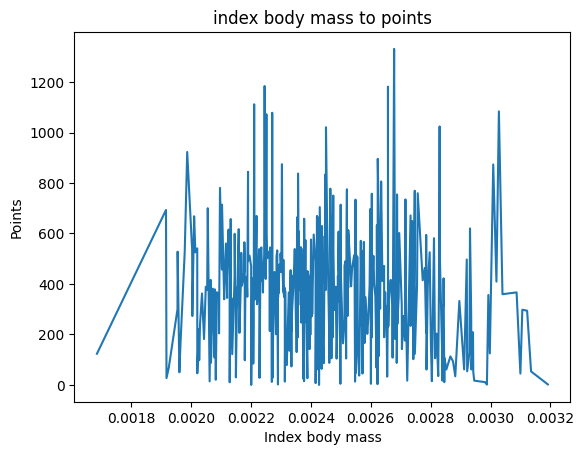

In [81]:
# plot graph

sns.lineplot(data=ibm_points, x=ibm_points.index, y='PTS')

plt.title("index body mass to points")
plt.xlabel("Index body mass")
plt.ylabel("Points")

plt.show()

As write in Wikipedia normal index body mass is from 0.18.5 to 0.25. and our graph showing that most players are in fit, but it does't has dependency to points

##what born years are longest in game

In [82]:
#lets define variable by columns "born" - when player was born and "years_played"
long_play_years = data.groupby("born")["years_played"].mean().to_frame()

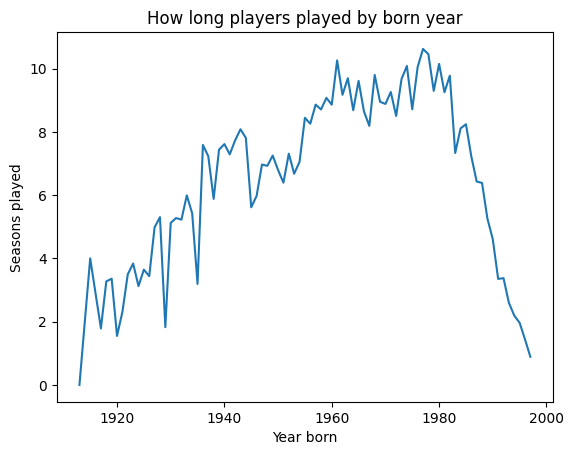

In [83]:
# plot graph

sns.lineplot(data=long_play_years, x=long_play_years.index, y='years_played')

plt.title("How long players played by born year")
plt.xlabel("Year born")
plt.ylabel("Seasons played")

plt.show()

we see, that most long players are born in 60th and 80th. line goes down to nowdays because players in game yet and sombody just started carrier

## Top 10 players by points and goals

In [84]:
#define players name, goals and sort them

best_10_goal = data.groupby("name")["goals_per_season"].mean().\
                                        sort_values(ascending=False).to_frame()

# just 10 players

best_10_goal = best_10_goal[:10]

In [85]:
#pip install -U kaleido

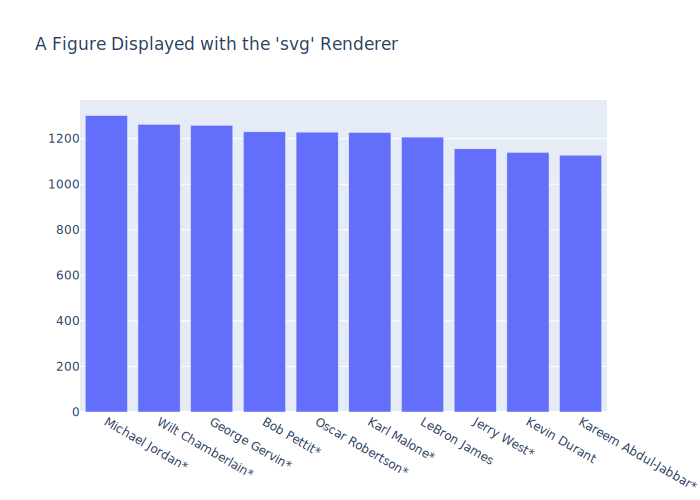

In [86]:
# let plot it by plotly library

#import plotly
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(x=best_10_goal.index, y=best_10_goal.goals_per_season)],
    layout_title_text="A Figure Displayed with the 'svg' Renderer"
)
fig.show(renderer="svg")

Jordan best of the best :)

In [87]:
#define players name, points and sort them

best_10_pts = data.groupby("name")["PTS"].mean().\
                                        sort_values(ascending=False).to_frame()

# just 10 players

best_10_pts = best_10_pts[:10]

top 10 players by points

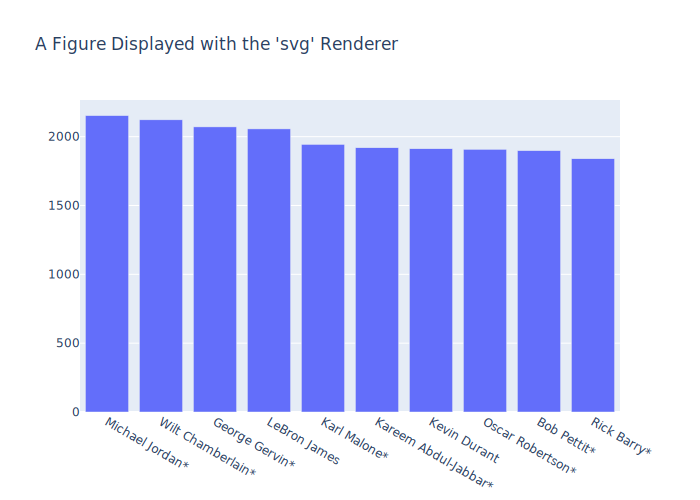

In [88]:
# let plot it by plotly library

#import plotly
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(x=best_10_pts.index, y=best_10_pts.PTS)],
    layout_title_text="A Figure Displayed with the 'svg' Renderer"
)
fig.show(renderer="svg")

Again this guys on a podium. Here`s LeBron James going 4's